In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader

from src.cityscapes_data_handler import Cityscapes, show_image


In [3]:
CITYSCAPES_FOLDER = Path("./data/cityscapes")
BATCH_SIZE = 2

## Train split

In [ ]:
train_dataset = Cityscapes(
    CITYSCAPES_FOLDER, split="train", is_transform=True, img_size=[512, 1024], dtype=torch.bfloat16
)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

imgs, lbls = next(iter(train_loader))
imgs.shape, imgs.dtype, lbls.shape, lbls.dtype

Found 2975 train images


(torch.Size([2, 3, 512, 1024]),
 torch.bfloat16,
 torch.Size([2, 1, 512, 1024]),
 torch.uint8)

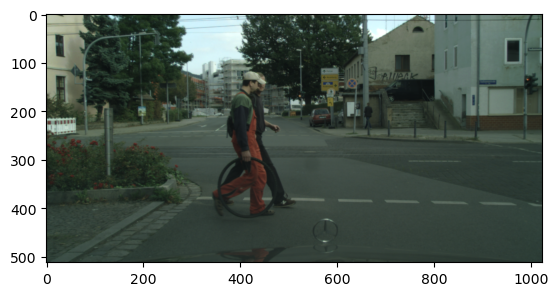

In [5]:
show_image(imgs[0]);

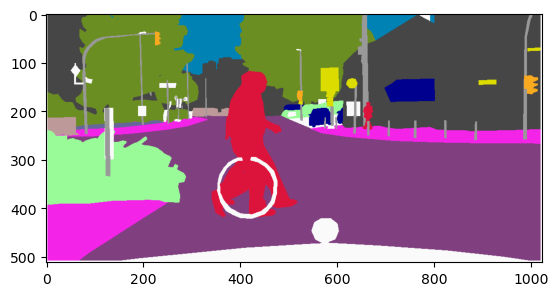

In [6]:
show_image(train_dataset.decode_segmap(lbls[0]));

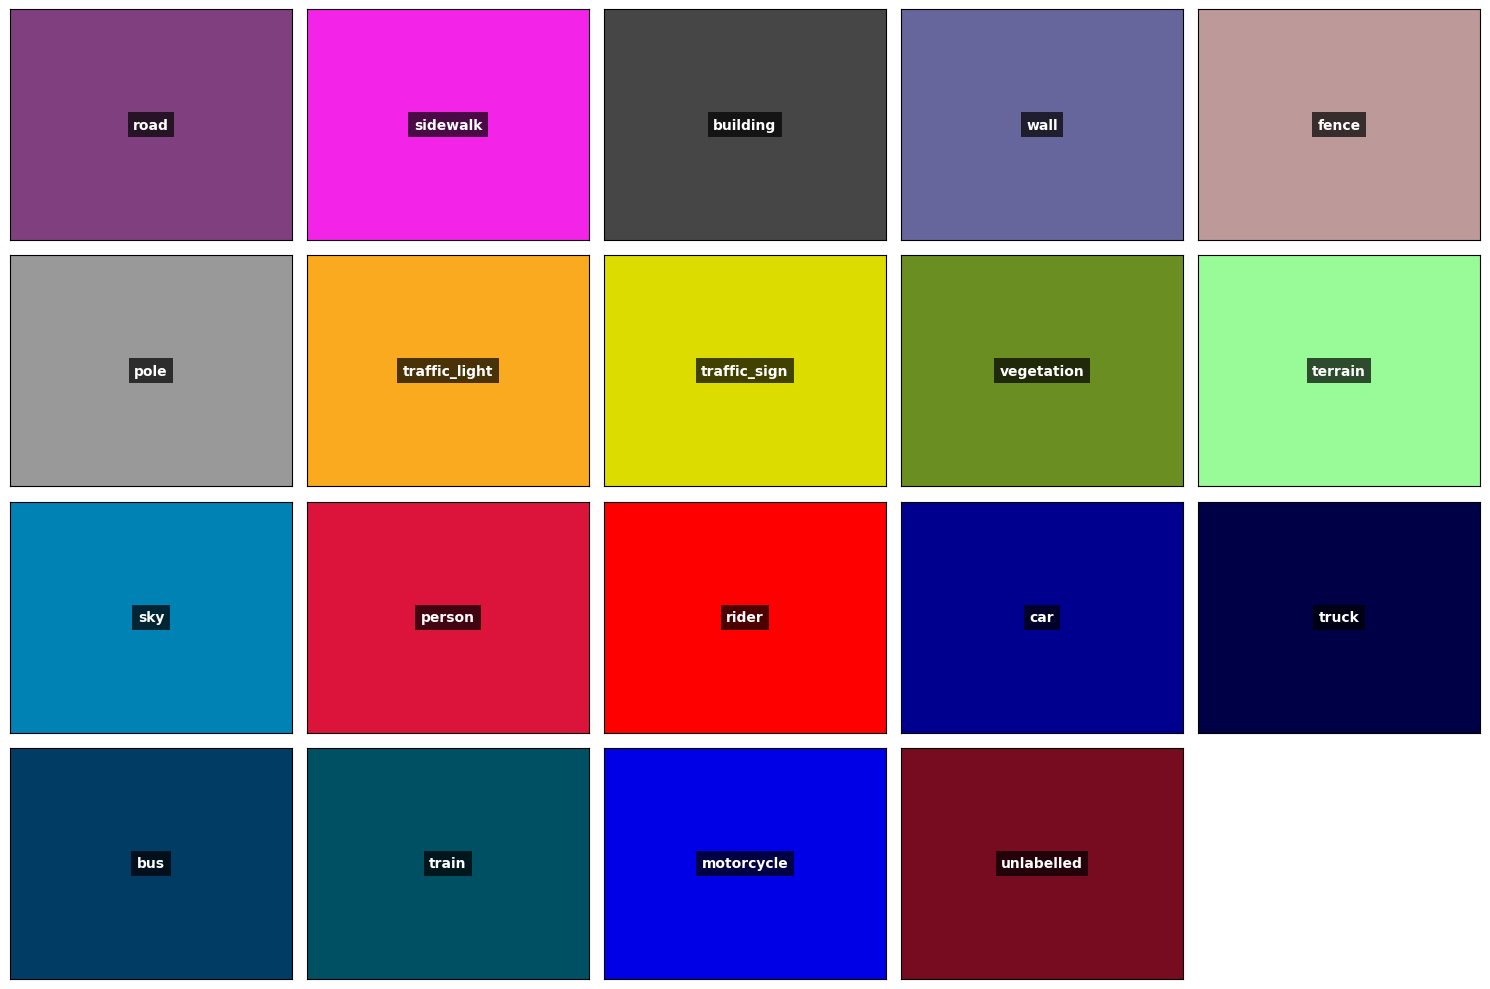

In [42]:
# Visualize classes and corresponding labels

rows, cols = 4, 5
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

colors = list(train_dataset.label_colours.values())
labels = [train_dataset.class_names[i] for i in list(train_dataset.label_colours.keys())[1:] + [0]]

for i, ax in enumerate(axes.flat):
    if i < len(train_dataset.label_colours):
        rgb = np.array(colors[i]) / 255.0
        ax.set_facecolor(rgb)
        ax.text(
            0.5,
            0.5,
            labels[i],
            color="white",
            ha="center",
            va="center",
            fontsize=10,
            fontweight="bold",
            bbox=dict(facecolor="black", alpha=0.7, edgecolor="none"),
        )
    else:
        ax.axis("off")

for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Val split

In [12]:
val_dataset = Cityscapes(
    CITYSCAPES_FOLDER, split="val", is_transform=True, img_size=[512, 1024], dtype=torch.bfloat16
)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

imgs, lbls = next(iter(val_loader))
imgs.shape, imgs.dtype, lbls.shape, lbls.dtype

Found 500 val images


(torch.Size([2, 3, 512, 1024]),
 torch.bfloat16,
 torch.Size([2, 1, 512, 1024]),
 torch.uint8)

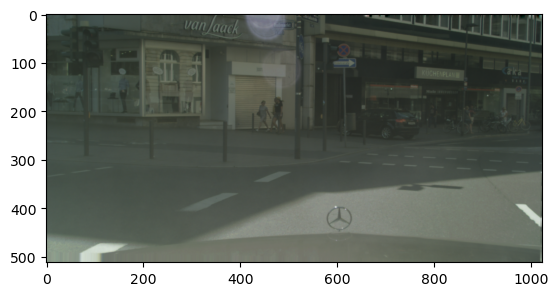

In [13]:
show_image(imgs[0]);

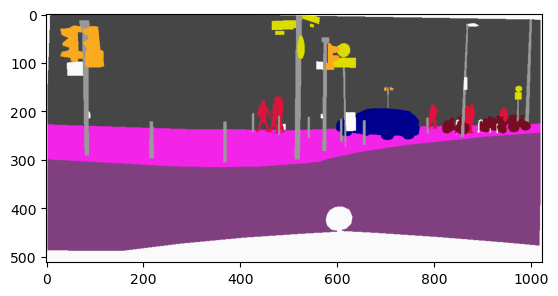

In [14]:
show_image(val_dataset.decode_segmap(lbls[0]));

## Test split

Because to get scores on test split, it requires to load predictions at https://www.cityscapes-dataset.com/ cite (and it has large cooldown 48h on 1 submit). So as test set i'll use part of val dataset.

In [ ]:
test_dataset = Cityscapes(
    CITYSCAPES_FOLDER, split="test", is_transform=True, img_size=[512, 1024], dtype=torch.bfloat16
)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

imgs, lbls = next(iter(test_loader))
imgs.shape, imgs.dtype, lbls.shape, lbls.dtype

Found 1525 test images


(torch.Size([2, 3, 512, 1024]),
 torch.bfloat16,
 torch.Size([2, 1, 512, 1024]),
 torch.uint8)

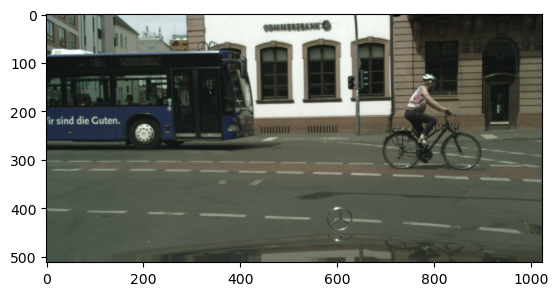

In [24]:
show_image(imgs[0]);

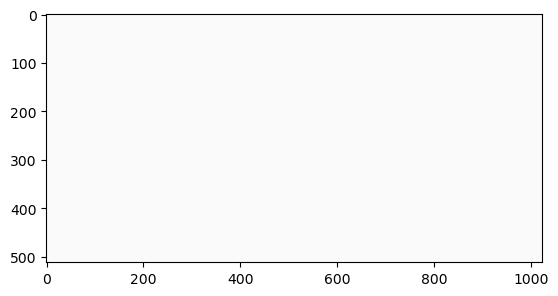

In [25]:
show_image(test_dataset.decode_segmap(lbls[0]));